Acurácia: 0.82
Precisão: 0.79
Recall (Sensibilidade): 0.83
Especificidade: 0.81
F-score: 0.81


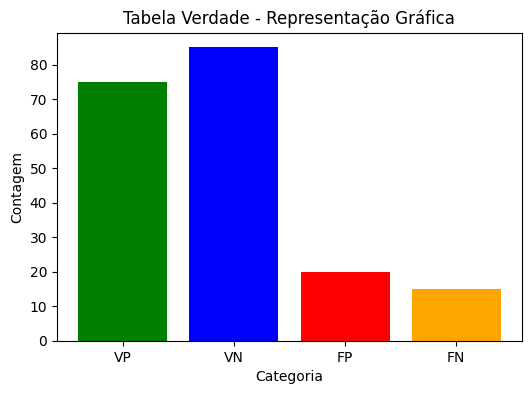

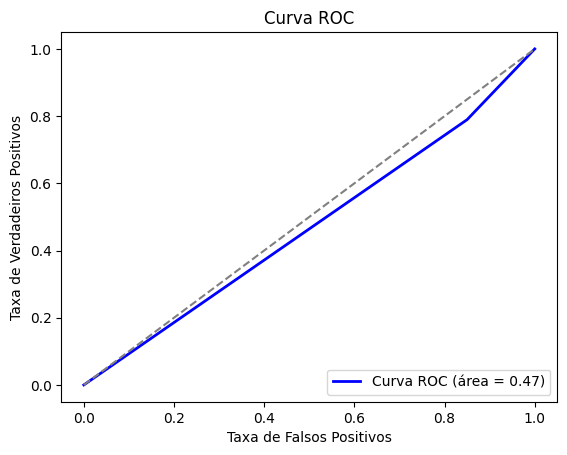

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def calcular_metricas(VP, VN, FP, FN):
    total = VP + VN + FP + FN

    # Acurácia
    acuracia = (VP + VN) / total if total != 0 else 0

    # Precisão
    precisao = VP / (VP + FP) if (VP + FP) != 0 else 0

    # Recall (Sensibilidade)
    recall = VP / (VP + FN) if (VP + FN) != 0 else 0

    # Especificidade
    especificidade = VN / (VN + FP) if (VN + FP) != 0 else 0

    # F-score (F1-Score)
    f_score = 2 * (precisao * recall) / (precisao + recall) if (precisao + recall) != 0 else 0

    return {
        "Acurácia": acuracia,
        "Precisão": precisao,
        "Recall (Sensibilidade)": recall,
        "Especificidade": especificidade,
        "F-score": f_score
    }

def gerar_curva_roc(VP, VN, FP, FN):
    y_true = np.array([1] * VP + [0] * FN + [1] * FP + [0] * VN)
    y_scores = np.array([1] * VP + [0] * FN + [0] * FP + [1] * VN)
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (área = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

def tabela_verdade_grafico(VP, VN, FP, FN):
    categorias = ['VP', 'VN', 'FP', 'FN']
    valores = [VP, VN, FP, FN]

    plt.figure(figsize=(6,4))
    plt.bar(categorias, valores, color=['green', 'blue', 'red', 'orange'])
    plt.xlabel('Categoria')
    plt.ylabel('Contagem')
    plt.title('Tabela Verdade - Representação Gráfica')
    plt.show()

# Exemplo de valores mais realistas para a matriz de confusão
VP = 75  # Verdadeiros Positivos
VN = 85  # Verdadeiros Negativos
FP = 20  # Falsos Positivos
FN = 15  # Falsos Negativos

# Calcular e exibir as métricas
metricas = calcular_metricas(VP, VN, FP, FN)
for metrica, valor in metricas.items():
    print(f"{metrica}: {valor:.2f}")

tabela_verdade_grafico(VP, VN, FP, FN)
gerar_curva_roc(VP, VN, FP, FN)
